# Lab2
By Yurii Voieividka

## Task 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings 


warnings.filterwarnings('ignore')

In [2]:
raw_data = pd.read_csv('./train.csv')
x_train = raw_data.drop(labels=['label'], axis=1)
y_train = raw_data['label']

In [3]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size =0.1, random_state=2)
print("x_train shape",x_train.shape)

x_train shape (37800, 784)


In [4]:
#Normilize the data
x_train = x_train / 255.0
x_test = x_test / 255.0

print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

x_train shape: (37800, 784)
x_test shape: (4200, 784)


In [5]:
x_train = x_train.values.reshape(-1,28,28,1)
x_test = x_test.values.reshape(-1,28,28,1)

In [6]:
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)
print(y_train)

[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]]


In [7]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size =0.1, random_state=2)
print("x_train shape",x_train.shape)

x_train shape (34020, 28, 28, 1)


In [8]:
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop, Adam, Adadelta
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model = Sequential([
    Conv2D(filters = 8, kernel_size = (5,5), padding = 'Same', activation='relu', input_shape=(28,28,1)),
    MaxPool2D(pool_size=(2,2)),
    Dropout(0.25),
    Conv2D(filters = 16, kernel_size = (3,3), padding = 'Same', activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Dropout(0.25),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

2022-10-28 00:10:59.478045: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
optimizer = Adadelta(lr=0.001)

In [10]:
#Compile
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

In [11]:
epochs = 10
batch_size = 250

In [12]:
#Data Augumentation

datagen = ImageDataGenerator(
    featurewise_center = False,
    samplewise_center = False,
    featurewise_std_normalization = False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=0.5,
    zoom_range=0.5,
    width_shift_range=0.5,
    height_shift_range=0.5,
    horizontal_flip=False,
    vertical_flip=False)

In [13]:
datagen.fit(x_train)

In [14]:

history = model.fit(datagen.flow(x_train,y_train, batch_size=batch_size), epochs = epochs, validation_data = (x_val,y_val), steps_per_epoch=x_train.shape[0] // batch_size )

Epoch 1/10
136/136 [==============================] - 6s 43ms/step - loss: 2.3312 - accuracy: 0.0998 - val_loss: 2.3132 - val_accuracy: 0.1040
Epoch 2/10
136/136 [==============================] - 6s 42ms/step - loss: 2.3290 - accuracy: 0.1022 - val_loss: 2.3120 - val_accuracy: 0.1045
Epoch 3/10
136/136 [==============================] - 6s 41ms/step - loss: 2.3302 - accuracy: 0.0999 - val_loss: 2.3109 - val_accuracy: 0.1040
Epoch 4/10
136/136 [==============================] - 6s 46ms/step - loss: 2.3274 - accuracy: 0.1049 - val_loss: 2.3099 - val_accuracy: 0.1048
Epoch 5/10
136/136 [==============================] - 6s 41ms/step - loss: 2.3265 - accuracy: 0.1028 - val_loss: 2.3090 - val_accuracy: 0.1053
Epoch 6/10
136/136 [==============================] - 6s 41ms/step - loss: 2.3269 - accuracy: 0.1028 - val_loss: 2.3082 - val_accuracy: 0.1058
Epoch 7/10
136/136 [==============================] - 6s 41ms/step - loss: 2.3285 - accuracy: 0.1008 - val_loss: 2.3075 - val_accuracy: 0.1069

<AxesSubplot:title={'center':'Adadelta'}>

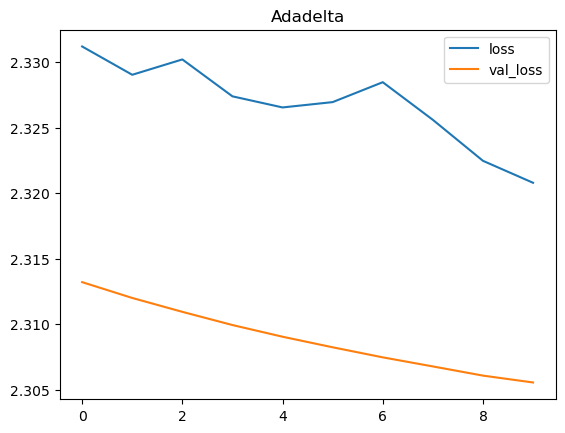

In [15]:
# plt.plot(history.history['val_loss'], color='b', label="validation loss")
# plt.title("Loss with adadelta")
# plt.xlabel("Number of Epochs")
# plt.ylabel("Loss")
# plt.legend()
# plt.show()
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Adadelta")


In [16]:
# Optimizer Adam

model_2 = Sequential([
    Conv2D(filters = 8, kernel_size = (5,5), padding = 'Same', activation='relu', input_shape=(28,28,1)),
    MaxPool2D(pool_size=(2,2)),
    Dropout(0.25),
    Conv2D(filters = 16, kernel_size = (3,3), padding = 'Same', activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Dropout(0.25),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
model_2.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])
history = model_2.fit(datagen.flow(x_train,y_train, batch_size=batch_size), epochs = epochs, validation_data = (x_val,y_val), steps_per_epoch=x_train.shape[0] // batch_size)

Epoch 1/10
136/136 [==============================] - 6s 42ms/step - loss: 2.2069 - accuracy: 0.1798 - val_loss: 1.7446 - val_accuracy: 0.4484
Epoch 2/10
136/136 [==============================] - 6s 42ms/step - loss: 1.9356 - accuracy: 0.3087 - val_loss: 1.2398 - val_accuracy: 0.6860
Epoch 3/10
136/136 [==============================] - 6s 42ms/step - loss: 1.7532 - accuracy: 0.3850 - val_loss: 0.9030 - val_accuracy: 0.7688
Epoch 4/10
136/136 [==============================] - 6s 41ms/step - loss: 1.6285 - accuracy: 0.4349 - val_loss: 0.7013 - val_accuracy: 0.8262
Epoch 5/10
136/136 [==============================] - 6s 41ms/step - loss: 1.5659 - accuracy: 0.4627 - val_loss: 0.5892 - val_accuracy: 0.8595
Epoch 6/10
136/136 [==============================] - 6s 42ms/step - loss: 1.4985 - accuracy: 0.4847 - val_loss: 0.5224 - val_accuracy: 0.8735
Epoch 7/10
136/136 [==============================] - 6s 43ms/step - loss: 1.4459 - accuracy: 0.5044 - val_loss: 0.4209 - val_accuracy: 0.9003

<AxesSubplot:title={'center':'Adam'}>

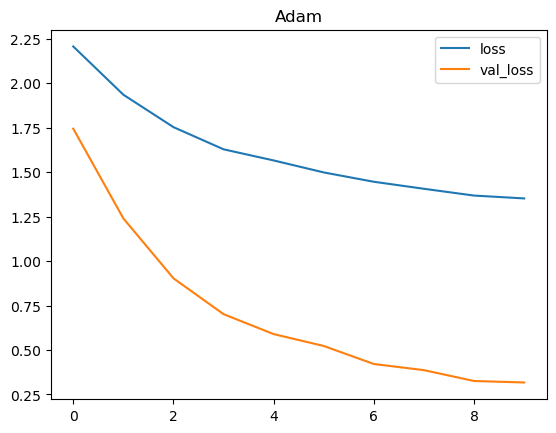

In [17]:
history_df = pd.DataFrame(history.history)
# plt.plot(, color='b', label="validation loss")
# plt.title("Loss with adam")
# plt.xlabel("Number of Epochs")
# plt.ylabel("Loss")
# plt.legend()
# plt.show()

history_df.loc[:, ['loss', 'val_loss']].plot(title="Adam")


In [18]:
# Preventing Overfitting

from tensorflow.keras import callbacks
early_stopping = callbacks.EarlyStopping(patience=5, min_delta=0.001, restore_best_weights=True)

model_3 = Sequential([
    Conv2D(filters = 8, kernel_size = (12,10), padding = 'Same', activation='relu', input_shape=(28,28,1)),
    MaxPool2D(pool_size=(2,2)),
    Dropout(0.25),
    Conv2D(filters = 16, kernel_size = (5,5), padding = 'Same', activation='relu'),
    Dropout(0.25),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Dropout(0.25),
    Conv2D(filters = 16, kernel_size = (3,3), padding = 'Same', activation='relu'),
    Dropout(0.25),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Dropout(0.25),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])


In [19]:
model_3.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

In [20]:
history = model_3.fit(datagen.flow(x_train,y_train, batch_size=batch_size), epochs = epochs, validation_data = (x_val,y_val), steps_per_epoch=x_train.shape[0] // batch_size,callbacks=[early_stopping])

Epoch 1/10
136/136 [==============================] - 9s 64ms/step - loss: 1.9836 - accuracy: 0.2760 - val_loss: 1.2635 - val_accuracy: 0.6450
Epoch 2/10
136/136 [==============================] - 9s 64ms/step - loss: 1.6537 - accuracy: 0.4099 - val_loss: 0.8700 - val_accuracy: 0.7976
Epoch 3/10
136/136 [==============================] - 9s 63ms/step - loss: 1.5140 - accuracy: 0.4616 - val_loss: 0.6819 - val_accuracy: 0.8481
Epoch 4/10
136/136 [==============================] - 9s 64ms/step - loss: 1.4236 - accuracy: 0.5008 - val_loss: 0.6054 - val_accuracy: 0.8516
Epoch 5/10
136/136 [==============================] - 9s 62ms/step - loss: 1.3658 - accuracy: 0.5208 - val_loss: 0.5506 - val_accuracy: 0.8648
Epoch 6/10
136/136 [==============================] - 9s 62ms/step - loss: 1.3212 - accuracy: 0.5351 - val_loss: 0.4676 - val_accuracy: 0.8815
Epoch 7/10
136/136 [==============================] - 9s 63ms/step - loss: 1.2878 - accuracy: 0.5473 - val_loss: 0.4023 - val_accuracy: 0.9005

<AxesSubplot:title={'center':'Adam'}>

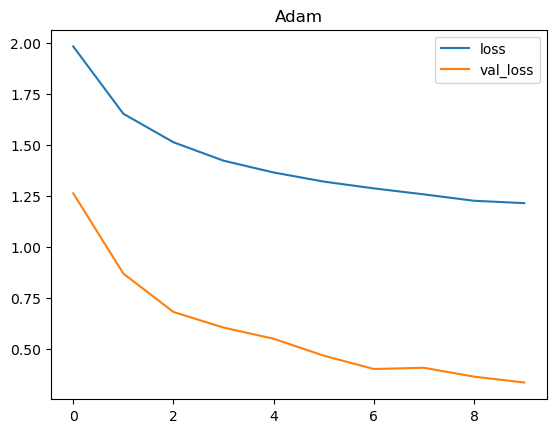

In [21]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Adam")


## Task 2

In [24]:
from keras.layers import AveragePooling2D

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(28, 28, 1))) 
model.add(AveragePooling2D(strides=2)) 
model.add(Conv2D(filters=48, kernel_size=(5,5), padding='valid', activation='relu'))
model.add(AveragePooling2D(strides=2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.build()
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 32)       0         
 ooling2D)                                                       
                                                                 
 conv2d_9 (Conv2D)           (None, 10, 10, 48)        38448     
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 48)         0         
 ePooling2D)                                                     
                                                                 
 flatten_3 (Flatten)         (None, 1200)              0         
                                                                 
 dense_6 (Dense)             (None, 256)              

In [ ]:
adam = Adam(lr=5e-4)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=adam)
# Set a learning rate annealer
reduce_lr = ReduceLROnPlateau(monitor='val_acc', patience=3,verbose=1,factor=0.2,min_lr=1e-6)
# Data Augmentation
datagen = ImageDataGenerator( rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1)

datagen.fit(x_train)
model.fit_generator(datagen.flow(x_train,y_train, batch_size=100), steps_per_epoch=len(x_train)/100, epochs=30, validation_data=(x_val,y_val), callbacks=[reduce_lr])

Epoch 1/30
340/340 [==============================] - 8s 23ms/step - loss: 0.6145 - accuracy: 0.8054 - val_loss: 0.1502 - val_accuracy: 0.9529 - lr: 5.0000e-04
Epoch 2/30
340/340 [==============================] - 8s 23ms/step - loss: 0.1862 - accuracy: 0.9442 - val_loss: 0.1073 - val_accuracy: 0.9680 - lr: 5.0000e-04
Epoch 3/30
340/340 [==============================] - 8s 24ms/step - loss: 0.1381 - accuracy: 0.9577 - val_loss: 0.0873 - val_accuracy: 0.9720 - lr: 5.0000e-04
Epoch 4/30
340/340 [==============================] - 8s 24ms/step - loss: 0.1133 - accuracy: 0.9658 - val_loss: 0.0664 - val_accuracy: 0.9794 - lr: 5.0000e-04
Epoch 5/30
340/340 [==============================] - 8s 23ms/step - loss: 0.1011 - accuracy: 0.9690 - val_loss: 0.0602 - val_accuracy: 0.9807 - lr: 5.0000e-04
Epoch 6/30
340/340 [==============================] - 8s 22ms/step - loss: 0.0880 - accuracy: 0.9737 - val_loss: 0.0526 - val_accuracy: 0.9828 - lr: 5.0000e-04
Epoch 7/30
340/340 [====================

In [ ]:
score = model.evaluate(X_val,Y_val, batch_size=32)